<a href="https://colab.research.google.com/github/muhit009/Ibm-dataset-analysis-and-predictions/blob/main/telco_customer_churn_Abdullah_Al_Muhit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [265]:
dataset = pd.read_excel('Telco_customer_churn.xlsx')

# **Analysing Dataset**

In [266]:
df = pd.DataFrame(dataset)

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [268]:
df.shape

(7043, 33)

*Basically there are 7043 rows and 33 columns*

In [269]:
df.head(10)

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   
5  4190-MFLUW      1  United States  California  Los Angeles     90020   
6  8779-QRDMV      1  United States  California  Los Angeles     90022   
7  1066-JKSGK      1  United States  California  Los Angeles     90024   
8  6467-CHFZW      1  United States  California  Los Angeles     90028   
9  8665-UTDHZ      1  United States  California  Los Angeles     90029   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   
5  34.066367, -118.309868  34.066367 -118.309868  Female  ...  Month-to-month   
6   34.02381, -118.156582  34.023810 -118.156582    Male  ...  Month-to-month   
7  34.066303, -118.435479  34.066303 -118.435479    Male  ...  Month-to-month   
8  34.099869, -118.326843  34.099869 -118.326843    Male  ...  Month-to-month   
9  34.089953, -118.294824  34.089953 -118.294824    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   
5                No    Credit card (automatic)            55.20        528.35   
6               Yes           Electronic check            39.65         39.65   
7                No               Mailed check            20.15         20.15   
8               Yes           Electronic check            99.35       4749.15   
9                No           Electronic check            30.20          30.2   

  Churn Label Churn Value Churn Score  CLTV  \
0         Yes           1          86  3239   
1         Yes           1          67  2701   
2         Yes           1          86  5372   
3         Yes           1          84  5003   
4         Yes           1          89  5340   
5         Yes           1          78  5925   
6         Yes           1         100  5433   
7         Yes           1          92  4832   
8         Yes           1          77  5789   
9         Yes           1          97  2915   

                                Churn Reason  
0               Competitor made better offer  
1                                      Moved  
2                                      Moved  
3                                      Moved  
4              Competitor had better devices  
5  Competitor offered higher download speeds  
6               Competitor offered more data  
7               Competitor made better offer  
8              Competitor had better devices  
9              Competitor had better devices  

[10 rows x 33 columns]

In [270]:
df.tail(10)

CustomerID  Count        Country       State              City  \
7033  0871-OPBXW      1  United States  California  Twentynine Palms   
7034  3605-JISKB      1  United States  California  Twentynine Palms   
7035  9767-FFLEM      1  United States  California       Westmorland   
7036  8456-QDAVC      1  United States  California       Winterhaven   
7037  7750-EYXWZ      1  United States  California      Yucca Valley   
7038  2569-WGERO      1  United States  California           Landers   
7039  6840-RESVB      1  United States  California          Adelanto   
7040  2234-XADUH      1  United States  California             Amboy   
7041  4801-JZAZL      1  United States  California      Angelus Oaks   
7042  3186-AJIEK      1  United States  California      Apple Valley   

      Zip Code                Lat Long   Latitude   Longitude  Gender  ...  \
7033     92277   34.17211, -115.769773  34.172110 -115.769773  Female  ...   
7034     92278  34.457829, -116.139589  34.457829 -116.139589    Male  ...   
7035     92281    33.03679, -115.60503  33.036790 -115.605030    Male  ...   
7036     92283  32.852947, -114.850784  32.852947 -114.850784    Male  ...   
7037     92284  34.159534, -116.425984  34.159534 -116.425984  Female  ...   
7038     92285  34.341737, -116.539416  34.341737 -116.539416  Female  ...   
7039     92301  34.667815, -117.536183  34.667815 -117.536183    Male  ...   
7040     92304  34.559882, -115.637164  34.559882 -115.637164  Female  ...   
7041     92305     34.1678, -116.86433  34.167800 -116.864330  Female  ...   
7042     92308  34.424926, -117.184503  34.424926 -117.184503    Male  ...   

            Contract Paperless Billing             Payment Method  \
7033  Month-to-month               Yes               Mailed check   
7034        One year                No    Credit card (automatic)   
7035  Month-to-month               Yes    Credit card (automatic)   
7036  Month-to-month               Yes  Bank transfer (automatic)   
7037        One year                No           Electronic check   
7038        Two year               Yes  Bank transfer (automatic)   
7039        One year               Yes               Mailed check   
7040        One year               Yes    Credit card (automatic)   
7041  Month-to-month               Yes           Electronic check   
7042        Two year               Yes  Bank transfer (automatic)   

      Monthly Charges Total Charges Churn Label Churn Value Churn Score  CLTV  \
7033            20.05         39.25          No           0          80  5191   
7034            60.00        3316.1          No           0          71  4212   
7035            69.50       2625.25          No           0          35  4591   
7036            78.70        1495.1          No           0          20  2464   
7037            60.65         743.3          No           0          24  3740   
7038            21.15        1419.4          No           0          45  5306   
7039            84.80        1990.5          No           0          59  2140   
7040           103.20        7362.9          No           0          71  5560   
7041            29.60        346.45          No           0          59  2793   
7042           105.65        6844.5          No           0          38  5097   

     Churn Reason  
7033          NaN  
7034          NaN  
7035          NaN  
7036          NaN  
7037          NaN  
7038          NaN  
7039          NaN  
7040          NaN  
7041          NaN  
7042          NaN  

[10 rows x 33 columns]

In [271]:
df.describe()

Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Churn Value  Churn Score         CLTV  
count      7043.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692     0.265370    58.699418  4400.295755  
std          30.090047     0.441561    21.525131  1183.057152  
min          18.250000     0.000000     5.000000  2003.000000  
25%          35.500000     0.000000    40.000000  3469.000000  
50%          70.350000     0.000000    61.000000  4527.000000  
75%          89.850000     1.000000    75.000000  5380.500000  
max         118.750000     1.000000   100.000000  6500.000000

In [272]:
df['Total Charges'].dtype

dtype('O')

*After analysis, in xcel sheet it looks likes Total Charges should be more likely to be a float data column. However, we can see here it is showing that this column is object data, meaning there is something wrong with this column.*

*So, let's make this data numerical and see what happens next*

In [273]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [274]:
df['Total Charges'].dtype

dtype('float64')

In [275]:
df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6530
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

# **Missing and Duplicate Values**

In [276]:
df.duplicated().sum()

0

*No duplicated values, so no need to handle it*

*Lets look for missing values*

In [277]:
null_info = pd.DataFrame({
    'Null Values': df.isnull().sum(),
    'Null Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data Type': df.dtypes
})

In [278]:
null_info

Null Values  Null Percentage Data Type
CustomerID                   0         0.000000    object
Count                        0         0.000000     int64
Country                      0         0.000000    object
State                        0         0.000000    object
City                         0         0.000000    object
Zip Code                     0         0.000000     int64
Lat Long                     0         0.000000    object
Latitude                     0         0.000000   float64
Longitude                    0         0.000000   float64
Gender                       0         0.000000    object
Senior Citizen               0         0.000000    object
Partner                      0         0.000000    object
Dependents                   0         0.000000    object
Tenure Months                0         0.000000     int64
Phone Service                0         0.000000    object
Multiple Lines               0         0.000000    object
Internet Service             0         0.000000    object
Online Security              0         0.000000    object
Online Backup                0         0.000000    object
Device Protection            0         0.000000    object
Tech Support                 0         0.000000    object
Streaming TV                 0         0.000000    object
Streaming Movies             0         0.000000    object
Contract                     0         0.000000    object
Paperless Billing            0         0.000000    object
Payment Method               0         0.000000    object
Monthly Charges              0         0.000000   float64
Total Charges               11         0.156183   float64
Churn Label                  0         0.000000    object
Churn Value                  0         0.000000     int64
Churn Score                  0         0.000000     int64
CLTV                         0         0.000000     int64
Churn Reason              5174        73.463013    object

*we can see 'Total Charges' and 'Churn Reason' have missing values and we need to handle them*

*Let's look more into these two columns*

In [279]:
df[df['Total Charges'].isna()]

CustomerID  Count        Country       State            City  Zip Code  \
2234  4472-LVYGI      1  United States  California  San Bernardino     92408   
2438  3115-CZMZD      1  United States  California    Independence     93526   
2568  5709-LVOEQ      1  United States  California       San Mateo     94401   
2667  4367-NUYAO      1  United States  California       Cupertino     95014   
2856  1371-DWPAZ      1  United States  California        Redcrest     95569   
4331  7644-OMVMY      1  United States  California     Los Angeles     90029   
4687  3213-VVOLG      1  United States  California        Sun City     92585   
5104  2520-SGTTA      1  United States  California      Ben Lomond     95005   
5719  2923-ARZLG      1  United States  California        La Verne     91750   
6772  4075-WKNIU      1  United States  California            Bell     90201   
6840  2775-SEFEE      1  United States  California      Wilmington     90744   

                    Lat Long   Latitude   Longitude  Gender  ...  Contract  \
2234  34.084909, -117.258107  34.084909 -117.258107  Female  ...  Two year   
2438  36.869584, -118.189241  36.869584 -118.189241    Male  ...  Two year   
2568  37.590421, -122.306467  37.590421 -122.306467  Female  ...  Two year   
2667  37.306612, -122.080621  37.306612 -122.080621    Male  ...  Two year   
2856  40.363446, -123.835041  40.363446 -123.835041  Female  ...  Two year   
4331  34.089953, -118.294824  34.089953 -118.294824    Male  ...  Two year   
4687  33.739412, -117.173334  33.739412 -117.173334    Male  ...  Two year   
5104  37.078873, -122.090386  37.078873 -122.090386  Female  ...  Two year   
5719  34.144703, -117.770299  34.144703 -117.770299    Male  ...  One year   
6772  33.970343, -118.171368  33.970343 -118.171368  Female  ...  Two year   
6840  33.782068, -118.262263  33.782068 -118.262263    Male  ...  Two year   

     Paperless Billing             Payment Method  Monthly Charges  \
2234               Yes  Bank transfer (automatic)            52.55   
2438                No               Mailed check            20.25   
2568                No               Mailed check            80.85   
2667                No               Mailed check            25.75   
2856                No    Credit card (automatic)            56.05   
4331                No               Mailed check            19.85   
4687                No               Mailed check            25.35   
5104                No               Mailed check            20.00   
5719               Yes               Mailed check            19.70   
6772                No               Mailed check            73.35   
6840               Yes  Bank transfer (automatic)            61.90   

     Total Charges Churn Label Churn Value Churn Score  CLTV Churn Reason  
2234           NaN          No           0          36  2578          NaN  
2438           NaN          No           0          68  5504          NaN  
2568           NaN          No           0          45  2048          NaN  
2667           NaN          No           0          48  4950          NaN  
2856           NaN          No           0          30  4740          NaN  
4331           NaN          No           0          53  2019          NaN  
4687           NaN          No           0          49  2299          NaN  
5104           NaN          No           0          27  3763          NaN  
5719           NaN          No           0          69  4890          NaN  
6772           NaN          No           0          44  2342          NaN  
6840           NaN          No           0          65  5188          NaN  

[11 rows x 33 columns]

*I am handling the missing values of 'Total Charges'.*

In [280]:
df['Total Charges'].value_counts()

20.20      11
19.75       9
20.05       8
19.65       8
19.90       8
           ..
444.75      1
5459.20     1
295.95      1
394.10      1
6844.50     1
Name: Total Charges, Length: 6530, dtype: int64

*First I wanted to use the averages to handles the missing values. However, we could have also fill the values with the higest value counts but we can see if we just multiply Monthly charges with tenure month we can get approximately the result of Total charge*

In [281]:
missing_charges = df['Total Charges'].isnull()
df.loc[missing_charges, 'Total Charges']= df['Tenure Months']* df['Monthly Charges']

In [282]:
df['Total Charges'].isnull().sum()

0

*Now for another column 'Churn Reason' there are around 73% of missing values,let's visualize why there are so many missing values*

In [283]:
df['Churn Reason'].isnull().sum()

5174

In [284]:
df['Churn Label'].value_counts()

No     5174
Yes    1869
Name: Churn Label, dtype: int64

*Before visualizing we can even see that people those who have not churned have no reason to explain whereas people who churned have a reason*

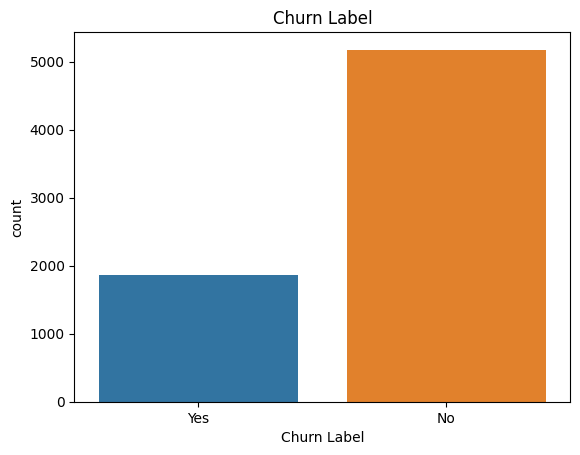

In [285]:
sns.countplot(x=df['Churn Label'])
plt.title('Churn Label')
plt.show()

*We can see if we handle missing values for 'Churn Reason', it will create a problem where maybe the dataset will get biased, so not handeling the missing values here*

# **EDA**

*Now for EDA, we can use pandas profiling and also we can do it manually, I will do pandas profiling first*

In [286]:
from ydata_profiling import ProfileReport
prof = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
prof.to_file(output_file = 'Telco_customer_churn.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [287]:
display(prof.to_notebook_iframe())

None

*LEt's do a bonus section, where I will analysis the demographic charechtaristics*

In [288]:
demographic_analysis = df.groupby(['Gender', 'Senior Citizen', 'Partner', 'Dependents'])['Churn Value'].mean().reset_index()

In [289]:
demographic_analysis

Gender Senior Citizen Partner Dependents  Churn Value
0   Female             No      No         No     0.322794
1   Female             No      No        Yes     0.183333
2   Female             No     Yes         No     0.260924
3   Female             No     Yes        Yes     0.045383
4   Female            Yes      No         No     0.493631
5   Female            Yes      No        Yes     0.666667
6   Female            Yes     Yes         No     0.353488
7   Female            Yes     Yes        Yes     0.151515
8     Male             No      No         No     0.308234
9     Male             No      No        Yes     0.134503
10    Male             No     Yes         No     0.278431
11    Male             No     Yes        Yes     0.032051
12    Male            Yes      No         No     0.483607
13    Male            Yes      No        Yes     0.200000
14    Male            Yes     Yes         No     0.388514
15    Male            Yes     Yes        Yes     0.068966

*Females who are senior citizens with no partner and have dependencies have the highest rate of churn about 66% as there maybe unstability, less usage of technologies and a lot more responsibilites. Other than that we can see:*

*Senior citizens have higher charn mean values than non-senior citizens as there maybe technological challenges*
*People with partners have lower mean in churn values because there maybe stability with a partner and responsibilites are more likely to be decided by both of them.*
*Females wihtout partners and dependents are more likely to churn while males have less mean churn value.*

*Let's see the geographic analysis based on country,state, cities etc*

In [290]:
geographical_analysis = df.groupby(['Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude'])['Churn Value'].mean().reset_index()

In [291]:
geographical_analysis

Country       State          City  Zip Code  \
0     United States  California        Acampo     95220   
1     United States  California         Acton     93510   
2     United States  California      Adelanto     92301   
3     United States  California          Adin     96006   
4     United States  California  Agoura Hills     91301   
...             ...         ...           ...       ...   
1647  United States  California     Yuba City     95991   
1648  United States  California     Yuba City     95993   
1649  United States  California       Yucaipa     92399   
1650  United States  California  Yucca Valley     92284   
1651  United States  California         Zenia     95595   

                    Lat Long   Latitude   Longitude  Churn Value  
0     38.200231, -121.235034  38.200231 -121.235034         0.75  
1     34.501452, -118.207862  34.501452 -118.207862         0.00  
2     34.667815, -117.536183  34.667815 -117.536183         0.20  
3     41.171578, -120.913161  41.171578 -120.913161         0.50  
4     34.129058, -118.759788  34.129058 -118.759788         0.40  
...                      ...        ...         ...          ...  
1647   39.02741, -121.614982  39.027410 -121.614982         0.00  
1648   39.075694, -121.70606  39.075694 -121.706060         0.50  
1649   34.04597, -117.011825  34.045970 -117.011825         0.25  
1650  34.159534, -116.425984  34.159534 -116.425984         0.00  
1651  40.170357, -123.417298  40.170357 -123.417298         0.25  

[1652 rows x 8 columns]

In [292]:
df['City'].value_counts()

Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: City, Length: 1129, dtype: int64

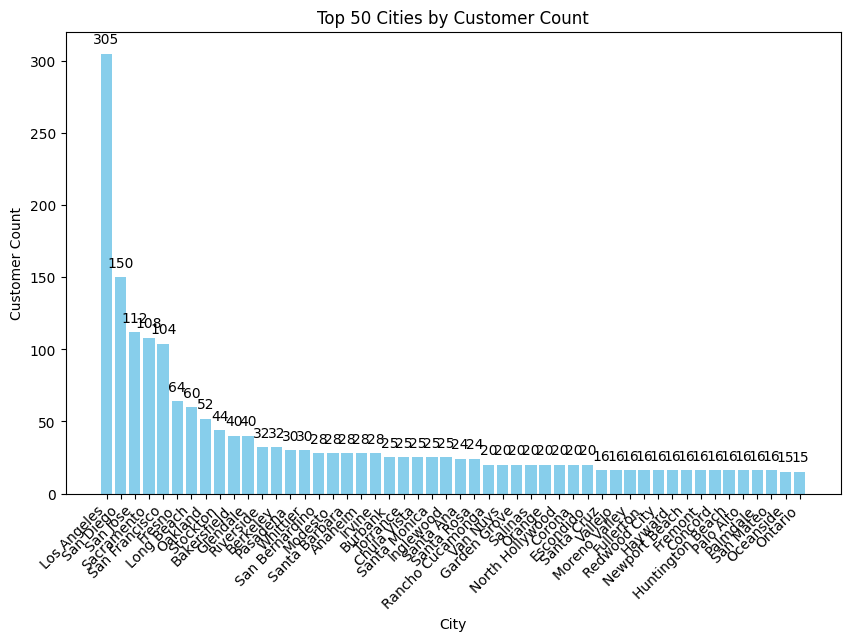

In [293]:
import matplotlib.pyplot as plt
city_counts = df.groupby('City')['CustomerID'].count().reset_index().sort_values('CustomerID', ascending=False).head(50)
plt.figure(figsize=(10, 6))
bars = plt.bar(city_counts['City'], city_counts['CustomerID'], color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, int(yval), ha='center', va='bottom')

plt.title('Top 50 Cities by Customer Count')
plt.xlabel('City')
plt.ylabel('Customer Count')
plt.xticks(rotation=45, ha='right')
plt.show()

*So a large populations are from big cities like LA,San Diego etc. Let's see a things based on latitued and longitude*

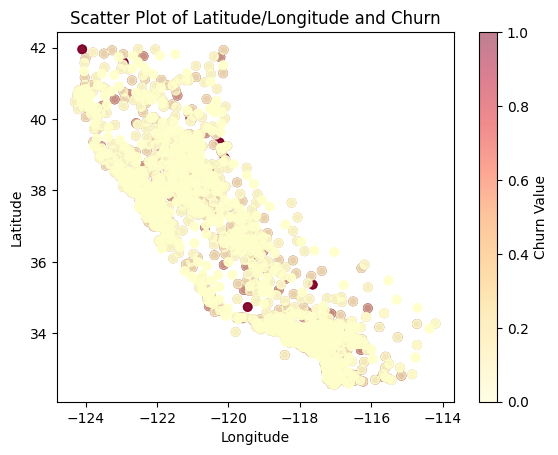

In [294]:
plt.scatter(df['Longitude'], df['Latitude'], c=df['Churn Value'], cmap='YlOrRd', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude/Longitude and Churn')
plt.colorbar(label='Churn Value')
plt.show()

*there is no outliers in the longitude and latitude as normally no data deviated from the scatter plot. We can see the most concentrated area in this plot is between the latitude of 38 to 40.*

*We can also see cities,countries and satet with highest rate of churn*

*To be honest there is only one country and state, let's just see their churn rates which should be the same*

In [295]:
city_churn = df.groupby('City')['Churn Value'].mean()

In [296]:
city_churn

City
Acampo          0.75
Acton           0.00
Adelanto        0.20
Adin            0.50
Agoura Hills    0.40
                ... 
Yreka           0.00
Yuba City       0.25
Yucaipa         0.25
Yucca Valley    0.00
Zenia           0.25
Name: Churn Value, Length: 1129, dtype: float64

In [297]:
max_city = city_churn.idxmax()
city_value = city_churn[city_churn.idxmax()]


In [298]:
print(f"Max Churn Value in City: {max_city} with value {city_value}")

Max Churn Value in City: Boulder Creek with value 1.0


*We can see the max churn value is in Boulder Creek*

*Now we do Service Utilization Analysis in order to see if there is different order and different results for different combinations of services.*

In [299]:
services_mean_churn = df.groupby(['Phone Service', 'Multiple Lines', 'Internet Service', 'Streaming TV', 'Streaming Movies'])['Churn Value'].mean().reset_index()

In [300]:
services_mean_churn

Phone Service    Multiple Lines Internet Service         Streaming TV  \
0             No  No phone service              DSL                   No   
1             No  No phone service              DSL                   No   
2             No  No phone service              DSL                  Yes   
3             No  No phone service              DSL                  Yes   
4            Yes                No              DSL                   No   
5            Yes                No              DSL                   No   
6            Yes                No              DSL                  Yes   
7            Yes                No              DSL                  Yes   
8            Yes                No      Fiber optic                   No   
9            Yes                No      Fiber optic                   No   
10           Yes                No      Fiber optic                  Yes   
11           Yes                No      Fiber optic                  Yes   
12           Yes                No               No  No internet service   
13           Yes               Yes              DSL                   No   
14           Yes               Yes              DSL                   No   
15           Yes               Yes              DSL                  Yes   
16           Yes               Yes              DSL                  Yes   
17           Yes               Yes      Fiber optic                   No   
18           Yes               Yes      Fiber optic                   No   
19           Yes               Yes      Fiber optic                  Yes   
20           Yes               Yes      Fiber optic                  Yes   
21           Yes               Yes               No  No internet service   

       Streaming Movies  Churn Value  
0                    No     0.257525  
1                   Yes     0.295918  
2                    No     0.247059  
3                   Yes     0.215000  
4                    No     0.265306  
5                   Yes     0.136691  
6                    No     0.151079  
7                   Yes     0.109890  
8                    No     0.485900  
9                   Yes     0.445087  
10                   No     0.525714  
11                  Yes     0.392550  
12  No internet service     0.086993  
13                   No     0.176991  
14                  Yes     0.096491  
15                   No     0.067961  
16                  Yes     0.060484  
17                   No     0.445946  
18                  Yes     0.414179  
19                   No     0.384906  
20                  Yes     0.370447  
21  No internet service     0.029240

In [301]:
service_sorted = services_mean_churn.sort_values(by='Churn Value', ascending=False)

In [302]:
service_sorted

Phone Service    Multiple Lines Internet Service         Streaming TV  \
10           Yes                No      Fiber optic                  Yes   
8            Yes                No      Fiber optic                   No   
17           Yes               Yes      Fiber optic                   No   
9            Yes                No      Fiber optic                   No   
18           Yes               Yes      Fiber optic                   No   
11           Yes                No      Fiber optic                  Yes   
19           Yes               Yes      Fiber optic                  Yes   
20           Yes               Yes      Fiber optic                  Yes   
1             No  No phone service              DSL                   No   
4            Yes                No              DSL                   No   
0             No  No phone service              DSL                   No   
2             No  No phone service              DSL                  Yes   
3             No  No phone service              DSL                  Yes   
13           Yes               Yes              DSL                   No   
6            Yes                No              DSL                  Yes   
5            Yes                No              DSL                   No   
7            Yes                No              DSL                  Yes   
14           Yes               Yes              DSL                   No   
12           Yes                No               No  No internet service   
15           Yes               Yes              DSL                  Yes   
16           Yes               Yes              DSL                  Yes   
21           Yes               Yes               No  No internet service   

       Streaming Movies  Churn Value  
10                   No     0.525714  
8                    No     0.485900  
17                   No     0.445946  
9                   Yes     0.445087  
18                  Yes     0.414179  
11                  Yes     0.392550  
19                   No     0.384906  
20                  Yes     0.370447  
1                   Yes     0.295918  
4                    No     0.265306  
0                    No     0.257525  
2                    No     0.247059  
3                   Yes     0.215000  
13                   No     0.176991  
6                    No     0.151079  
5                   Yes     0.136691  
7                   Yes     0.109890  
14                  Yes     0.096491  
12  No internet service     0.086993  
15                   No     0.067961  
16                  Yes     0.060484  
21  No internet service     0.029240

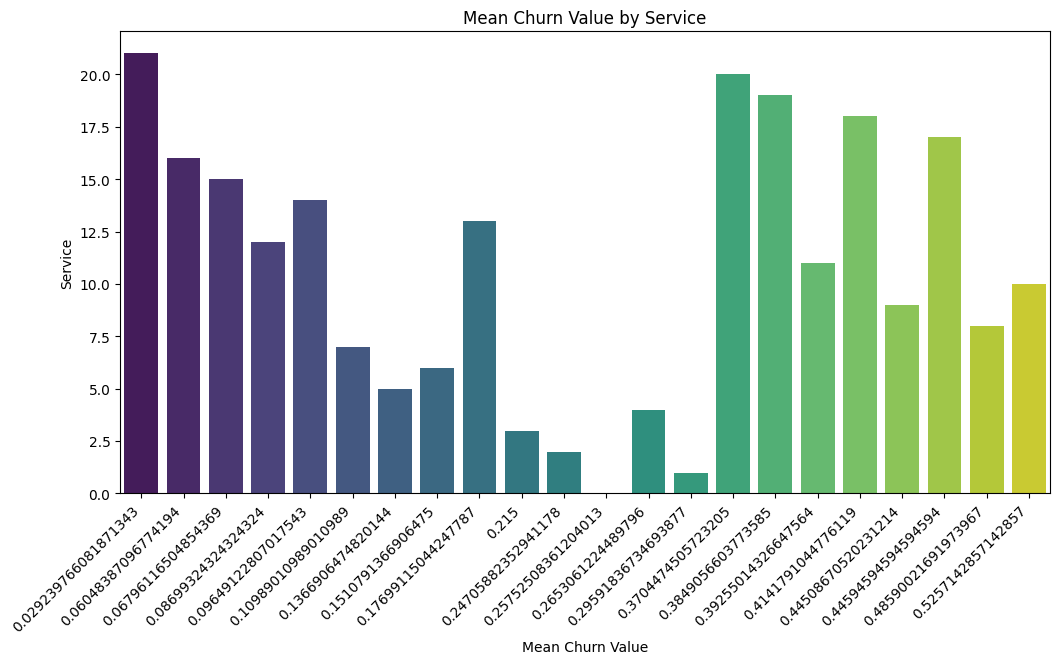

In [303]:
plt.figure(figsize=(12, 6))
sns.barplot(x=service_sorted['Churn Value'], y=service_sorted.index, palette='viridis')
plt.title('Mean Churn Value by Service')
plt.xlabel('Mean Churn Value')
plt.ylabel('Service')
plt.xticks(rotation=45, ha='right')
plt.show()

*So, we can say there are different combinations for churn in service. For example, we can see most people who have churned are with phone service and multiple lines,uses fiber optics, streaming TV services and does not stream movies.*
*Also, we can see most of the people who churned have fiber optics, what is happening?*

*Other than these we can see rest of the columns and their interpretation in the html file generated by pandas profiler*

*Other important columns that we can visualise are churn rates on contract type, charges etc.*

*If we look at contract type and churn value there are some realtionships between them, let's see*

In [304]:
contract = df.groupby(['Contract','Churn Label'])['Tenure Months'].mean()

In [305]:
contract

Contract        Churn Label
Month-to-month  No             21.033333
                Yes            14.016918
One year        No             41.674063
                Yes            44.963855
Two year        No             56.602914
                Yes            61.270833
Name: Tenure Months, dtype: float64

*let's see realtionship with monthly charges*

In [306]:
df.groupby('Churn Label')['Monthly Charges'].quantile([.50,.75,.95,.99])

Churn Label      
No           0.50     64.4250
             0.75     88.4000
             0.95    108.4175
             0.99    115.1000
Yes          0.50     79.6500
             0.75     94.2000
             0.95    105.6100
             0.99    111.1320
Name: Monthly Charges, dtype: float64

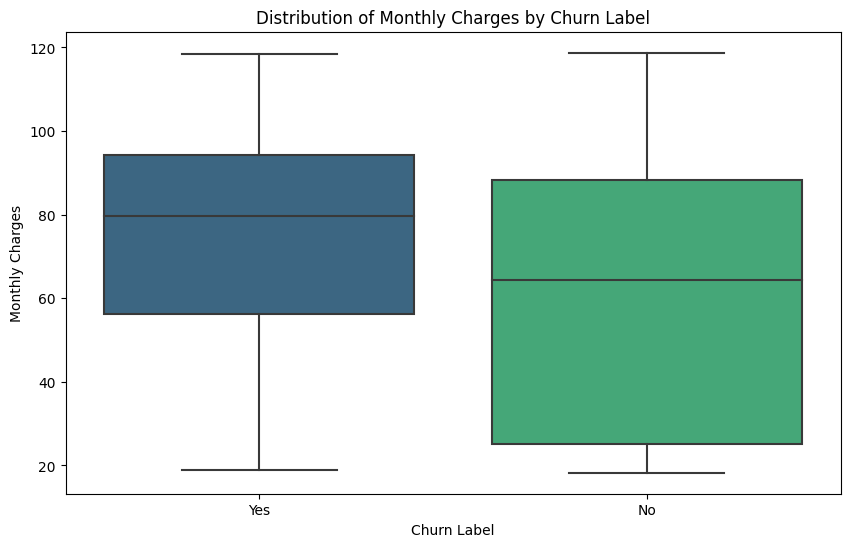

In [307]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn Label', y='Monthly Charges', data=df, palette='viridis')
plt.title('Distribution of Monthly Charges by Churn Label')
plt.xlabel('Churn Label')
plt.ylabel('Monthly Charges')
plt.show()

# **Feature Scaling**

*Now for the next part, data preprocessing where we will prepare the data for the predicitve algo*

*Will be dropping the column based on unimportant and not needed columns.*

*1st, I will drop datas which has no importance suc as
 'Customer Id'*


*2nd, I will drop 'Churn Reason' as there are a lot of missing values and handeling them might make the dataset bias*


 *3rd, will drop columns with constant values or one values for a column like 'Count', 'Zip Code' etc.*


 *4th, will drop columns with low correlations*

In [308]:
df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

In [309]:
cor = df.corr()

<ipython-input-309-1f0d48ef3315>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<ipython-input-310-bf438730d23f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



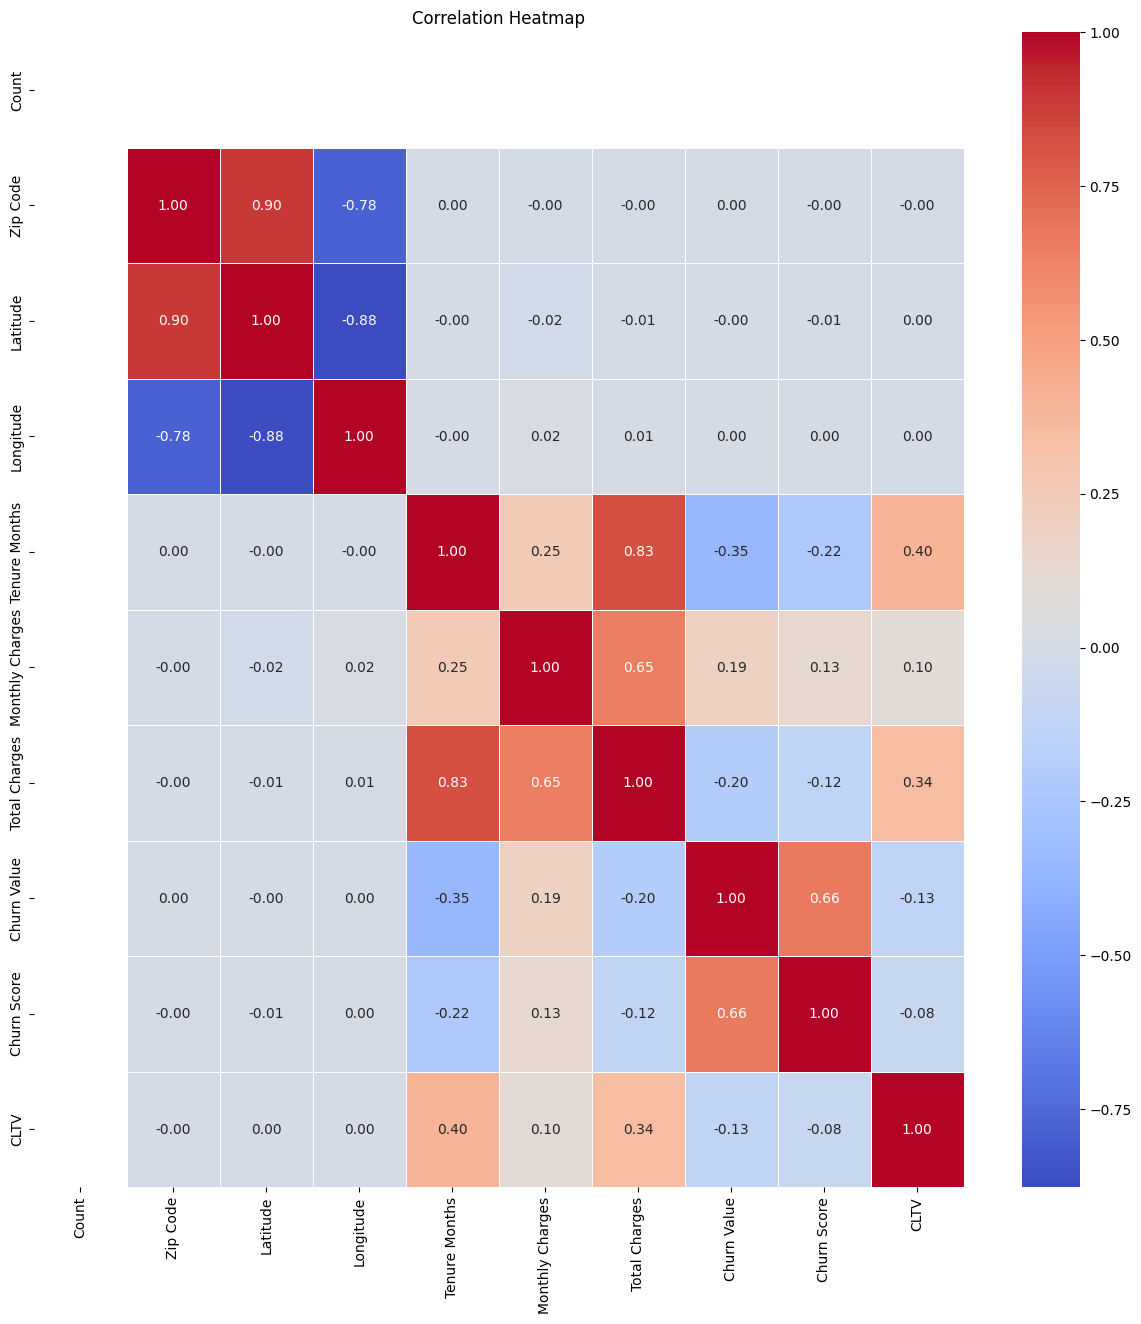

In [310]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [311]:
df = df.drop(['Country','State','Count','Zip Code','Churn Reason','City','Churn Score','Churn Value','CLTV','CustomerID','Lat Long','Latitude','Longitude'], axis = 1)

In [312]:
df

Gender Senior Citizen Partner Dependents  Tenure Months Phone Service  \
0       Male             No      No         No              2           Yes   
1     Female             No      No        Yes              2           Yes   
2     Female             No      No        Yes              8           Yes   
3     Female             No     Yes        Yes             28           Yes   
4       Male             No      No        Yes             49           Yes   
...      ...            ...     ...        ...            ...           ...   
7038  Female             No      No         No             72           Yes   
7039    Male             No     Yes        Yes             24           Yes   
7040  Female             No     Yes        Yes             72           Yes   
7041  Female             No     Yes        Yes             11            No   
7042    Male             No      No         No             66           Yes   

        Multiple Lines Internet Service      Online Security  \
0                   No              DSL                  Yes   
1                   No      Fiber optic                   No   
2                  Yes      Fiber optic                   No   
3                  Yes      Fiber optic                   No   
4                  Yes      Fiber optic                   No   
...                ...              ...                  ...   
7038                No               No  No internet service   
7039               Yes              DSL                  Yes   
7040               Yes      Fiber optic                   No   
7041  No phone service              DSL                  Yes   
7042                No      Fiber optic                  Yes   

            Online Backup    Device Protection         Tech Support  \
0                     Yes                   No                   No   
1                      No                   No                   No   
2                      No                  Yes                   No   
3                      No                  Yes                  Yes   
4                     Yes                  Yes                   No   
...                   ...                  ...                  ...   
7038  No internet service  No internet service  No internet service   
7039                   No                  Yes                  Yes   
7040                  Yes                  Yes                   No   
7041                   No                   No                   No   
7042                   No                  Yes                  Yes   

             Streaming TV     Streaming Movies        Contract  \
0                      No                   No  Month-to-month   
1                      No                   No  Month-to-month   
2                     Yes                  Yes  Month-to-month   
3                     Yes                  Yes  Month-to-month   
4                     Yes                  Yes  Month-to-month   
...                   ...                  ...             ...   
7038  No internet service  No internet service        Two year   
7039                  Yes                  Yes        One year   
7040                  Yes                  Yes        One year   
7041                   No                   No  Month-to-month   
7042                  Yes                  Yes        Two year   

     Paperless Billing             Payment Method  Monthly Charges  \
0                  Yes               Mailed check            53.85   
1                  Yes           Electronic check            70.70   
2                  Yes           Electronic check            99.65   
3                  Yes           Electronic check           104.80   
4                  Yes  Bank transfer (automatic)           103.70   
...                ...                        ...              ...   
7038               Yes  Bank transfer (automatic)            21.15   
7039               Yes               Mailed check            84.80   
7040        

In [313]:
df.describe()

Tenure Months  Monthly Charges  Total Charges
count    7043.000000      7043.000000    7043.000000
mean       32.371149        64.761692    2279.734304
std        24.559481        30.090047    2266.794470
min         0.000000        18.250000       0.000000
25%         9.000000        35.500000     398.550000
50%        29.000000        70.350000    1394.550000
75%        55.000000        89.850000    3786.600000
max        72.000000       118.750000    8684.800000

In [314]:
df.head(10)

Gender Senior Citizen Partner Dependents  Tenure Months Phone Service  \
0    Male             No      No         No              2           Yes   
1  Female             No      No        Yes              2           Yes   
2  Female             No      No        Yes              8           Yes   
3  Female             No     Yes        Yes             28           Yes   
4    Male             No      No        Yes             49           Yes   
5  Female             No     Yes         No             10           Yes   
6    Male            Yes      No         No              1            No   
7    Male             No      No         No              1           Yes   
8    Male             No     Yes        Yes             47           Yes   
9    Male             No     Yes         No              1            No   

     Multiple Lines Internet Service      Online Security  \
0                No              DSL                  Yes   
1                No      Fiber optic                   No   
2               Yes      Fiber optic                   No   
3               Yes      Fiber optic                   No   
4               Yes      Fiber optic                   No   
5                No              DSL                   No   
6  No phone service              DSL                   No   
7                No               No  No internet service   
8               Yes      Fiber optic                   No   
9  No phone service              DSL                   No   

         Online Backup    Device Protection         Tech Support  \
0                  Yes                   No                   No   
1                   No                   No                   No   
2                   No                  Yes                   No   
3                   No                  Yes                  Yes   
4                  Yes                  Yes                   No   
5                   No                  Yes                  Yes   
6                   No                  Yes                   No   
7  No internet service  No internet service  No internet service   
8                  Yes                   No                   No   
9                  Yes                   No                   No   

          Streaming TV     Streaming Movies        Contract Paperless Billing  \
0                   No                   No  Month-to-month               Yes   
1                   No                   No  Month-to-month               Yes   
2                  Yes                  Yes  Month-to-month               Yes   
3                  Yes                  Yes  Month-to-month               Yes   
4                  Yes                  Yes  Month-to-month               Yes   
5                   No                   No  Month-to-month                No   
6                   No                  Yes  Month-to-month               Yes   
7  No internet service  No internet service  Month-to-month                No   
8                  Yes                  Yes  Month-to-month               Yes   
9                   No                   No  Month-to-month                No   

              Payment Method  Monthly Charges  Total Charges Churn Label  
0               Mailed check            53.85         108.15         Yes  
1           Electronic check            70.70         151.65         Yes  
2           Electronic check            99.65         820.50         Yes  
3           Electronic check           104.80        3046.05         Yes  
4  Bank transfer (automatic)           103.70        5036.30         Yes  
5    Credit card (automatic)            55.20         528.35         Yes  
6           Electronic check            39.65          39.65         Yes  
7               Mailed check            20.15          20.15         Yes  
8           Electronic check            99.35        4749.15         Yes  
9           Electronic check            30.20          30.20         Yes

# **Encoding**

*We are going to make a prediction based on Churn Label, so if yes=1, no=0*

In [315]:
df['Churn Label']= df['Churn Label'].replace({'Yes':1, 'No':0})

In [316]:
df['Churn Label'].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Churn Label, dtype: int64

In [317]:
df['Churn Label'].tail(10)

7033    0
7034    0
7035    0
7036    0
7037    0
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Label, dtype: int64

*Let's encode 'object' type data, we can use One Hot Encoding or Label Encoding, let's use One Hot Encoding*

In [318]:
object_columns = df.select_dtypes(include=['object']).columns

In [319]:
from sklearn.preprocessing import OneHotEncoder
df_object = df[object_columns]
encoder = OneHotEncoder(drop='first', sparse=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df_object), columns=encoder.get_feature_names_out(df_object.columns))
df_final = pd.concat([df.drop(object_columns, axis=1), df_encoded], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [320]:
df_final.head()

Tenure Months  Monthly Charges  Total Charges  Churn Label  Gender_Male  \
0              2            53.85         108.15            1          1.0   
1              2            70.70         151.65            1          0.0   
2              8            99.65         820.50            1          0.0   
3             28           104.80        3046.05            1          0.0   
4             49           103.70        5036.30            1          1.0   

   Senior Citizen_Yes  Partner_Yes  Dependents_Yes  Phone Service_Yes  \
0                 0.0          0.0             0.0                1.0   
1                 0.0          0.0             1.0                1.0   
2                 0.0          0.0             1.0                1.0   
3                 0.0          1.0             1.0                1.0   
4                 0.0          0.0             1.0                1.0   

   Multiple Lines_No phone service  ...  Streaming TV_No internet service  \
0                              0.0  ...                               0.0   
1                              0.0  ...                               0.0   
2                              0.0  ...                               0.0   
3                              0.0  ...                               0.0   
4                              0.0  ...                               0.0   

   Streaming TV_Yes  Streaming Movies_No internet service  \
0               0.0                                   0.0   
1               0.0                                   0.0   
2               1.0                                   0.0   
3               1.0                                   0.0   
4               1.0                                   0.0   

   Streaming Movies_Yes  Contract_One year  Contract_Two year  \
0                   0.0                0.0                0.0   
1                   0.0                0.0                0.0   
2                   1.0                0.0                0.0   
3                   1.0                0.0                0.0   
4                   1.0                0.0                0.0   

   Paperless Billing_Yes  Payment Method_Credit card (automatic)  \
0                    1.0                                     0.0   
1                    1.0                                     0.0   
2                    1.0                                     0.0   
3                    1.0                                     0.0   
4                    1.0                                     0.0   

   Payment Method_Electronic check  Payment Method_Mailed check  
0                              0.0                          1.0  
1                              1.0                          0.0  
2                              1.0                          0.0  
3                              1.0                          0.0  
4                              0.0                          0.0  

[5 rows x 31 columns]

In [321]:
df = df_final

*Here we drop the first level of each object type data column to avoid multicollinearity*

*Also, if Churn Label has imbalanced data then we need to balance the data for better predictions*

In [322]:
df['Churn Label'].value_counts()

0    5174
1    1869
Name: Churn Label, dtype: int64

*Three options to balancing the datas: under sampling the majority class, over sampling the minority class, Synthetic Data Generation*

*For both under sampling and over sampling, the data may get biased as under sampling might change or discard valuable informations whereas over sampling might lead to overfit*

*So, I am going to use SMOTE(Synthetic Data Generation)*

*1st, I am going to divide the dependent and independent variable(y,X respectively)*

In [323]:
X = df.drop('Churn Label', axis=1)
y = df['Churn Label']

In [324]:
df.head()

Tenure Months  Monthly Charges  Total Charges  Churn Label  Gender_Male  \
0              2            53.85         108.15            1          1.0   
1              2            70.70         151.65            1          0.0   
2              8            99.65         820.50            1          0.0   
3             28           104.80        3046.05            1          0.0   
4             49           103.70        5036.30            1          1.0   

   Senior Citizen_Yes  Partner_Yes  Dependents_Yes  Phone Service_Yes  \
0                 0.0          0.0             0.0                1.0   
1                 0.0          0.0             1.0                1.0   
2                 0.0          0.0             1.0                1.0   
3                 0.0          1.0             1.0                1.0   
4                 0.0          0.0             1.0                1.0   

   Multiple Lines_No phone service  ...  Streaming TV_No internet service  \
0                              0.0  ...                               0.0   
1                              0.0  ...                               0.0   
2                              0.0  ...                               0.0   
3                              0.0  ...                               0.0   
4                              0.0  ...                               0.0   

   Streaming TV_Yes  Streaming Movies_No internet service  \
0               0.0                                   0.0   
1               0.0                                   0.0   
2               1.0                                   0.0   
3               1.0                                   0.0   
4               1.0                                   0.0   

   Streaming Movies_Yes  Contract_One year  Contract_Two year  \
0                   0.0                0.0                0.0   
1                   0.0                0.0                0.0   
2                   1.0                0.0                0.0   
3                   1.0                0.0                0.0   
4                   1.0                0.0                0.0   

   Paperless Billing_Yes  Payment Method_Credit card (automatic)  \
0                    1.0                                     0.0   
1                    1.0                                     0.0   
2                    1.0                                     0.0   
3                    1.0                                     0.0   
4                    1.0                                     0.0   

   Payment Method_Electronic check  Payment Method_Mailed check  
0                              0.0                          1.0  
1                              1.0                          0.0  
2                              1.0                          0.0  
3                              1.0                          0.0  
4                              0.0                          0.0  

[5 rows x 31 columns]

In [325]:
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Churn Label, dtype: int64

In [326]:
X.head(10)

Tenure Months  Monthly Charges  Total Charges  Gender_Male  \
0              2            53.85         108.15          1.0   
1              2            70.70         151.65          0.0   
2              8            99.65         820.50          0.0   
3             28           104.80        3046.05          0.0   
4             49           103.70        5036.30          1.0   
5             10            55.20         528.35          0.0   
6              1            39.65          39.65          1.0   
7              1            20.15          20.15          1.0   
8             47            99.35        4749.15          1.0   
9              1            30.20          30.20          1.0   

   Senior Citizen_Yes  Partner_Yes  Dependents_Yes  Phone Service_Yes  \
0                 0.0          0.0             0.0                1.0   
1                 0.0          0.0             1.0                1.0   
2                 0.0          0.0             1.0                1.0   
3                 0.0          1.0             1.0                1.0   
4                 0.0          0.0             1.0                1.0   
5                 0.0          1.0             0.0                1.0   
6                 1.0          0.0             0.0                0.0   
7                 0.0          0.0             0.0                1.0   
8                 0.0          1.0             1.0                1.0   
9                 0.0          1.0             0.0                0.0   

   Multiple Lines_No phone service  Multiple Lines_Yes  ...  \
0                              0.0                 0.0  ...   
1                              0.0                 0.0  ...   
2                              0.0                 1.0  ...   
3                              0.0                 1.0  ...   
4                              0.0                 1.0  ...   
5                              0.0                 0.0  ...   
6                              1.0                 0.0  ...   
7                              0.0                 0.0  ...   
8                              0.0                 1.0  ...   
9                              1.0                 0.0  ...   

   Streaming TV_No internet service  Streaming TV_Yes  \
0                               0.0               0.0   
1                               0.0               0.0   
2                               0.0               1.0   
3                               0.0               1.0   
4                               0.0               1.0   
5                               0.0               0.0   
6                               0.0               0.0   
7                               1.0               0.0   
8                               0.0               1.0   
9                               0.0               0.0   

   Streaming Movies_No internet service  Streaming Movies_Yes  \
0                                   0.0                   0.0   
1                                   0.0                   0.0   
2                                   0.0                   1.0   
3                                   0.0                   1.0   
4                                   0.0                   1.0   
5                                   0.0                   0.0   
6                                   0.0                   1.0   
7                                   1.0                   0.0   
8                                   0.0                   1.0   
9                                   0.0                   0.0   

   Contract_One year  Contract_Two year  Paperless Billing_Yes  \
0                0.0                0.0                    1.0   
1                0.0                0.0                    1.0   
2                0.0                0.0                    1.0   
3                0.0                0.0                    1.0   
4                0.0                0.0                    1.0   
5                0.0                0.0          

In [327]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [328]:
X = X_resampled
y= y_resampled

In [329]:
y.value_counts()

1    5174
0    5174
Name: Churn Label, dtype: int64

*lets divide the datas in training and testing datas*

In [330]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42, stratify = y)

*It's about time to run a predicitve model*

# **Model Building**

In [331]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [332]:
y_pred = xgb_classifier.predict(X_test)

In [333]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,make_scorer
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [334]:
print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 0.8601

Confusion Matrix:
[[1129  165]
 [ 197 1096]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1294
           1       0.87      0.85      0.86      1293

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587



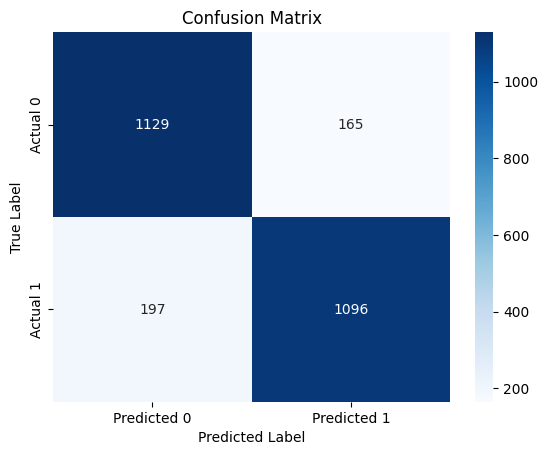

In [335]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [336]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_prob = xgb_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [337]:
print(f'ROC-AUC Score: {roc_auc:.4f}')

ROC-AUC Score: 0.9422


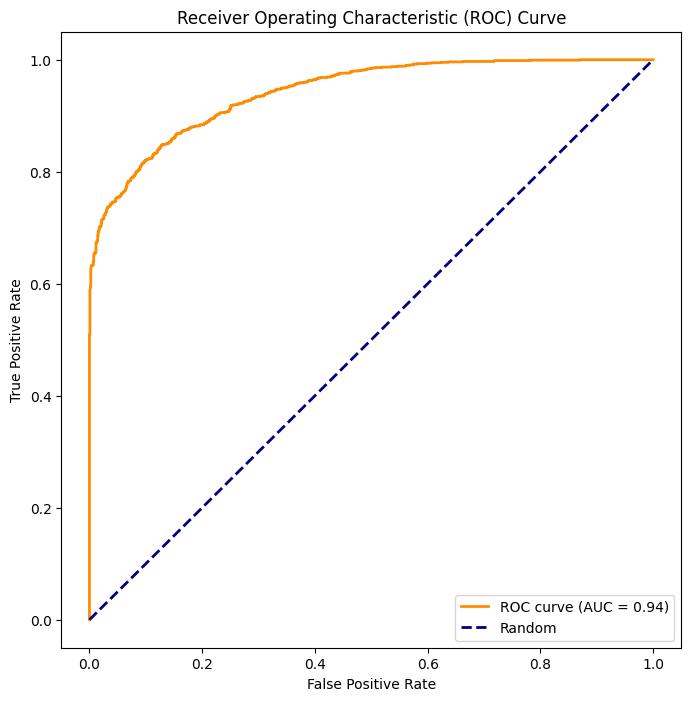

In [338]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

*We can see the accuracy is around 86% in xgboost classification, after analyzing the confusion matrix we can see that the model have TP of 1129,which means in real life customer has churned and model has predicted properly(Churn Label=1). TN are 1096 which means model have predicted 0 for churn label 0 in most of the cases. FN are 197, where model thought class is negative(0) but in real life it was positive(1). FP are 165, where prediction should have been negative(0)*

*precision = (TP)/(TP+FP)*

*recall = (TP)/(TP+FN*)

*accuracy = (TP+TN)/(TP+TN+FP+FN)==0.86*

*Let's cross validate and tune the hyparameters*

In [339]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
scorer = make_scorer(accuracy_score)
num_folds = 5
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_classifier, X, y, cv=cv, scoring=scorer)


In [340]:
print("Cross-Validation Scores:", cv_scores)
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-Validation Scores: [0.86859903 0.85748792 0.85942029 0.85693572 0.84871919]
Mean Accuracy: 0.8582
Standard Deviation: 0.0064


In [341]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [342]:
from sklearn.model_selection import GridSearchCV
scoring_metric = 'accuracy'
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring=scoring_metric, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Best Model: {accuracy:.4f}")

Test Accuracy with Best Model: 0.8666


In [343]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
